Предсказание рукописных чисел из базы mnist

Использование разных архитектур для создания модели

# Импорт библиотек

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image 
import numpy as np 
import pylab
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

%matplotlib inline 

# Загрузка базы mnist

In [ ]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


# Нормирование и преобразование x_train и y_train

In [ ]:


x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

x_train = x_train.astype('float32') 
x_train = x_train / 255 
x_test = x_test.astype('float32') 
x_test = x_test / 255 

y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)


# Експеримент с нейронной сетью 1 (10 нейронов на первый слой)

In [ ]:
modelOne = Sequential()
modelOne.add(Dense(10, input_dim=784, activation="relu"))
modelOne.add(Dense(400, activation="relu"))
modelOne.add(Dense(10, activation="softmax"))
modelOne.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelOne.summary())

modelOne.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               4400      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 16,260
Trainable params: 16,260
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
469/469 [==============================] - 2s 3ms/step - loss: 0.5135 - accuracy: 0.8474
Epoch 2/15
469/469 [==============================] - 2s 3ms/step - loss: 0.2450 - accuracy: 0.9278
Epoch 3/15
469/469 [==============================] - 1s 3ms/step - loss: 0.2030 - accuracy: 0.9405
Epoch 4/15
469/469 [==============================] - 2s 3ms/step - loss: 0.1

Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7f921f1ef5f0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


In [ ]:
print(modelOne.train_on_batch(x_test, y_test)[1])

0.9674714207649231


In [ ]:
# точность модели
accuracyOne = modelOne.train_on_batch(x_test, y_test)[1]

# Эксперимент с нейронной сетью 2 (100 нейронов на первый слой)



In [ ]:
modelTwo = Sequential()
modelTwo.add(Dense(100, input_dim=784, activation="relu"))
modelTwo.add(Dense(400, activation="relu"))
modelTwo.add(Dense(10, activation="softmax"))
modelTwo.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelTwo.summary())

modelTwo.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 400)               40400     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 122,910
Trainable params: 122,910
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.3108 - accuracy: 0.9131
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1209 - accuracy: 0.9634
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0862 - accuracy: 0.9736
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss:

In [ ]:
# точность модели
accuracyTwo = modelTwo.train_on_batch(x_test, y_test)[1]

# Эксперимент с нейронной сетью 3 (5000 нейронов на первый слой)

In [ ]:
modelThree = Sequential()
modelThree.add(Dense(5000, input_dim=784, activation="relu"))
modelThree.add(Dense(400, activation="relu"))
modelThree.add(Dense(10, activation="softmax"))
modelThree.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelThree.summary())

modelThree.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5000)              3925000   
_________________________________________________________________
dense_7 (Dense)              (None, 400)               2000400   
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4010      
Total params: 5,929,410
Trainable params: 5,929,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
469/469 [==============================] - 46s 96ms/step - loss: 0.1800 - accuracy: 0.9445
Epoch 2/15
469/469 [==============================] - 45s 96ms/step - loss: 0.0730 - accuracy: 0.9769
Epoch 3/15
469/469 [==============================] - 45s 96ms/step - loss: 0.0469 - accuracy: 0.9850
Epoch 4/15
469/469 [==============================] - 44s 94ms/

In [ ]:
# точность модели
accuracyThree = modelThree.train_on_batch(x_test, y_test)[1]

# Эксперимент с нейронной сетью 4 (активационная функция во всех скрытых слоях linear)

In [ ]:
modelFour = Sequential()
modelFour.add(Dense(800, input_dim=784, activation="linear"))
modelFour.add(Dense(400, activation="linear"))
modelFour.add(Dense(10, activation="softmax"))
modelFour.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelFour.summary())

modelFour.fit(x_train, y_train, batch_size=128, epochs=15, verbose=1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_10 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
469/469 [==============================] - 9s 18ms/step - loss: 0.3917 - accuracy: 0.8870
Epoch 2/15
469/469 [==============================] - 8s 18ms/step - loss: 0.3297 - accuracy: 0.9079
Epoch 3/15
469/469 [==============================] - 8s 18ms/step - loss: 0.3098 - accuracy: 0.9130
Epoch 4/15
469/469 [==============================] - 8s 18ms/step - l

In [ ]:
# точность модели
accuracyFour = modelFour.train_on_batch(x_test, y_test)[1]

# Эксперимент с нейронной сетью 5 (batch_size = 1)

In [ ]:
modelFive = Sequential()
modelFive.add(Dense(800, input_dim=784, activation="relu"))
modelFive.add(Dense(400, activation="relu"))
modelFive.add(Dense(10, activation="softmax"))
modelFive.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelFive.summary())

modelFive.fit(x_train, y_train, batch_size=1, epochs=15, verbose=1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_13 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
60000/60000 [==============================] - 363s 6ms/step - loss: 0.2835 - accuracy: 0.9271
Epoch 2/15
60000/60000 [==============================] - 376s 6ms/step - loss: 0.1889 - accuracy: 0.9567
Epoch 3/15
60000/60000 [==============================] - 349s 6ms/step - loss: 0.1724 - accuracy: 0.9650
Epoch 4/15
60000/60000 [==============================]

In [ ]:
# точность модели
accuracyFive = modelFive.train_on_batch(x_test, y_test)[1]

# Эксперимент с нейронной сетью 6 (batch_size = 10)

In [ ]:
modelSix = Sequential()
modelSix.add(Dense(800, input_dim=784, activation="relu"))
modelSix.add(Dense(400, activation="relu"))
modelSix.add(Dense(10, activation="softmax"))
modelSix.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelSix.summary())

modelSix.fit(x_train, y_train, batch_size=10, epochs=15, verbose=1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_16 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
6000/6000 [==============================] - 103s 17ms/step - loss: 0.1858 - accuracy: 0.9446
Epoch 2/15
6000/6000 [==============================] - 120s 20ms/step - loss: 0.0955 - accuracy: 0.9713
Epoch 3/15
6000/6000 [==============================] - 120s 20ms/step - loss: 0.0671 - accuracy: 0.9803
Epoch 4/15
6000/6000 [==============================] - 11

In [ ]:
# точность модели
accuracySix = modelSix.train_on_batch(x_test, y_test)[1]

# Эксперимент с нейронной сетью 7 (batch_size = 100)

In [ ]:
modelSeven = Sequential()
modelSeven.add(Dense(800, input_dim=784, activation="relu"))
modelSeven.add(Dense(400, activation="relu"))
modelSeven.add(Dense(10, activation="softmax"))
modelSeven.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelSeven.summary())

modelSeven.fit(x_train, y_train, batch_size=100, epochs=15, verbose=1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_19 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
600/600 [==============================] - 12s 20ms/step - loss: 0.1980 - accuracy: 0.9405
Epoch 2/15
600/600 [==============================] - 13s 21ms/step - loss: 0.0747 - accuracy: 0.9764
Epoch 3/15
600/600 [==============================] - 11s 18ms/step - loss: 0.0476 - accuracy: 0.9851
Epoch 4/15
600/600 [==============================] - 11s 18ms/step

In [ ]:
# точность модели
accuracySeven = modelSeven.train_on_batch(x_test, y_test)[1]

# Эксперимент с нейронной сетью 8 (batch_size = 60000)

In [ ]:
modelEight = Sequential()
modelEight.add(Dense(800, input_dim=784, activation="relu"))
modelEight.add(Dense(400, activation="relu"))
modelEight.add(Dense(10, activation="softmax"))
modelEight.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelEight.summary())

modelEight.fit(x_train, y_train, batch_size=60000, epochs=15, verbose=1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 800)               628000    
_________________________________________________________________
dense_22 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
1/1 [==============================] - 5s 5s/step - loss: 2.3130 - accuracy: 0.0846
Epoch 2/15
1/1 [==============================] - 5s 5s/step - loss: 1.9032 - accuracy: 0.5893
Epoch 3/15
1/1 [==============================] - 5s 5s/step - loss: 1.5504 - accuracy: 0.7177
Epoch 4/15
1/1 [==============================] - 5s 5s/step - loss: 1.2217 - accuracy: 

In [ ]:
# точность модели
accuracyEight = modelEight.train_on_batch(x_test, y_test)[1]

# Подведение итогов

                    Точность модели:
Номер эксперимента                  
Э.1                         0.958500
Э.2                         0.994443
Э.3                         0.993600
Э.4                         0.925214
Э.5                         0.971286
Э.6                         0.991771
Э.7                         0.995157
Э.8                         0.905714


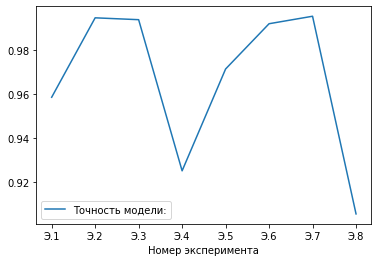

In [ ]:
inds = [f"Э." + str(i) for i in range(1, 9)]
accur = [accuracyOne, accuracyTwo, accuracyThree, accuracyFour, accuracyFive,
        accuracySix, accuracySeven, accuracyEight,]

tableAccuracy = pd.DataFrame({
    "Точность модели:": accur,
}, index=inds)
tableAccuracy.index.name = "Номер эксперимента"
print(tableAccuracy)
tableAccuracy.plot()
plt.show()

# ВЫВОД

Во время проведения экспериментов над моделью били замечены следующие закономерности:

При изменении количества нейронов изменения в точности были заметны только при увеличении с 10 до 100 нейронов, при этом время обучения модели тоже зависило от количества нейронов, поэтому вариант с 5000 нейронов выполнялся намного дольше, чем предыдущие варианты.

изменение активационной функции с 'relu' на 'linear' дало точность ниже, при этом время, затраченное на обучение, не изменилось.

Из эксперимента по изменению batch_size можно сделать вывод: чем выше значение гиперпараметра, тем выше качество обученной модели и ниже время требуемое на обучение. Однако с определенного значения точность начинает падать.
